In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file='merged_data bat.csv'
odi_batting_df=pd.read_csv(file)

In [3]:
odi_batting_df

,id,name,span,matches,innings,not_out,runs,high_score,average_score,ball_faced,strike_rate,100s,50,0s,4s,6s
0,420402,Afsar Zazai,2014-2017,17,16.0,1.0,264.0,60,17.60,488.0,54.09,0.0,2.0,3.0,15.0,0.0
1,921509,Ibrahim Zadran,2019-2022,8,8.0,1.0,433.0,162,61.85,497.0,87.12,3.0,0.0,0.0,45.0,5.0
2,568136,Fareed Ahmad,2014-2022,11,3.0,3.0,7.0,6*,NaN,21.0,33.33,0.0,0.0,0.0,0.0,0.0
3,819429,Azmatullah Omarzai,2021-2022,7,4.0,1.0,35.0,15*,11.66,56.0,62.50,0.0,0.0,0.0,5.0,0.0
4,440970,Hashmatullah Shahidi,2013-2022,53,53.0,7.0,1505.0,97*,32.71,2295.0,65.57,0.0,13.0,4.0,128.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,450101,RA Reifer,2019-2021,5,4.0,0.0,36.0,27,9.00,71.0,50.70,0.0,0.0,1.0,1.0,0.0
343,1206110,K Sinclair,2022-2022,3,1.0,1.0,3.0,3*,NaN,4.0,75.00,0.0,0.0,0.0,0.0,0.0
344,820691,OF Smith,2022-2022,5,5.0,1.0,144.0,46,36.00,75.0,192.00,0.0,0.0,0.0,8.0,14.0
345,443263,HR Walsh,2019-2022,22,12.0,3.0,155.0,46*,17.22,212.0,73.11,0.0,0.0,0.0,19.0,1.0


In [6]:
odi_batting_df.isnull().sum()

id                0
name              0
span             19
matches           0
innings           8
not_out           8
runs              8
high_score        8
average_score    21
ball_faced        8
strike_rate       8
100s              8
50                8
0s                8
4s                8
6s                8
dtype: int64

Text(0.5, 1.0, 'Distribution of Runs')

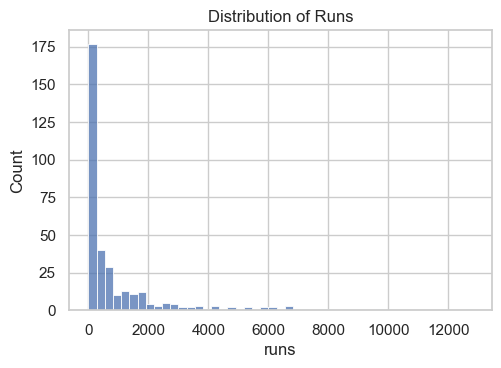

In [12]:
# Visualizing the distribution of key variables
plt.figure(figsize=(12, 8))

# Distribution of runs
plt.subplot(2, 2, 1)
sns.histplot(odi_batting_df['runs'])
plt.title('Distribution of Runs')


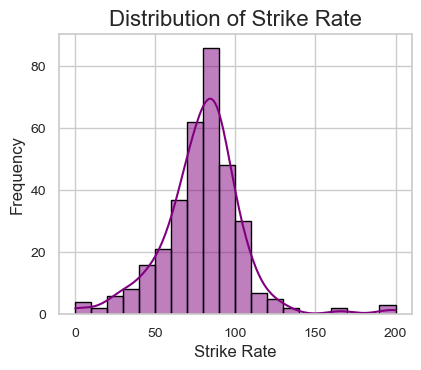

In [15]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the histogram with Seaborn styling
plt.subplot(2, 2, 2)
sns.set(style="whitegrid")
sns.histplot(odi_batting_df['strike_rate'], bins=20, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Strike Rate', fontsize=16)
plt.xlabel('Strike Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tick_params(axis='both', labelsize=10)


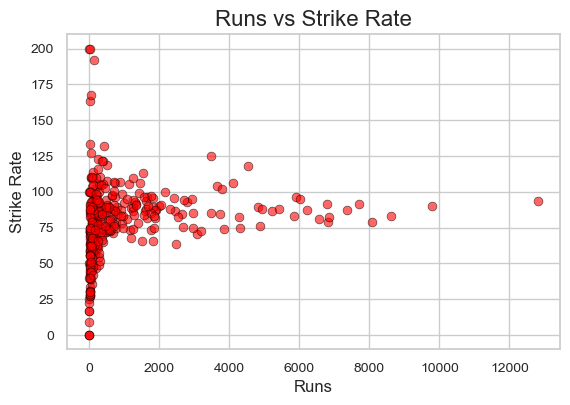

In [44]:

plt.figure(figsize=(14, 9))

# Plot the scatter plot with Seaborn styling
plt.subplot(2, 2, 3)
sns.set(style="whitegrid")
sns.scatterplot(x='runs', y='strike_rate', data=odi_batting_df, color='red', edgecolor='black', alpha=0.6, s=40)
plt.title('Runs vs Strike Rate', fontsize=16)
plt.xlabel('Runs', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.tick_params(axis='both', labelsize=10)

# Show the plot

In [23]:
# Sorting the data by runs in descending order
odi_batting_df_sorted = odi_batting_df.sort_values(by='runs', ascending=False)

# Displaying the sorted data
print("Top Players by Runs:")
print(odi_batting_df_sorted[['id', 'name', 'runs']].head())


Top Players by Runs:
         id         name     runs
116  253802      V Kohli  12809.0
210   34102    RG Sharma   9782.0
265   38699  LRPL Taylor   8607.0
244   56194  Tamim Iqbal   8074.0
295   24598   EJG Morgan   7701.0


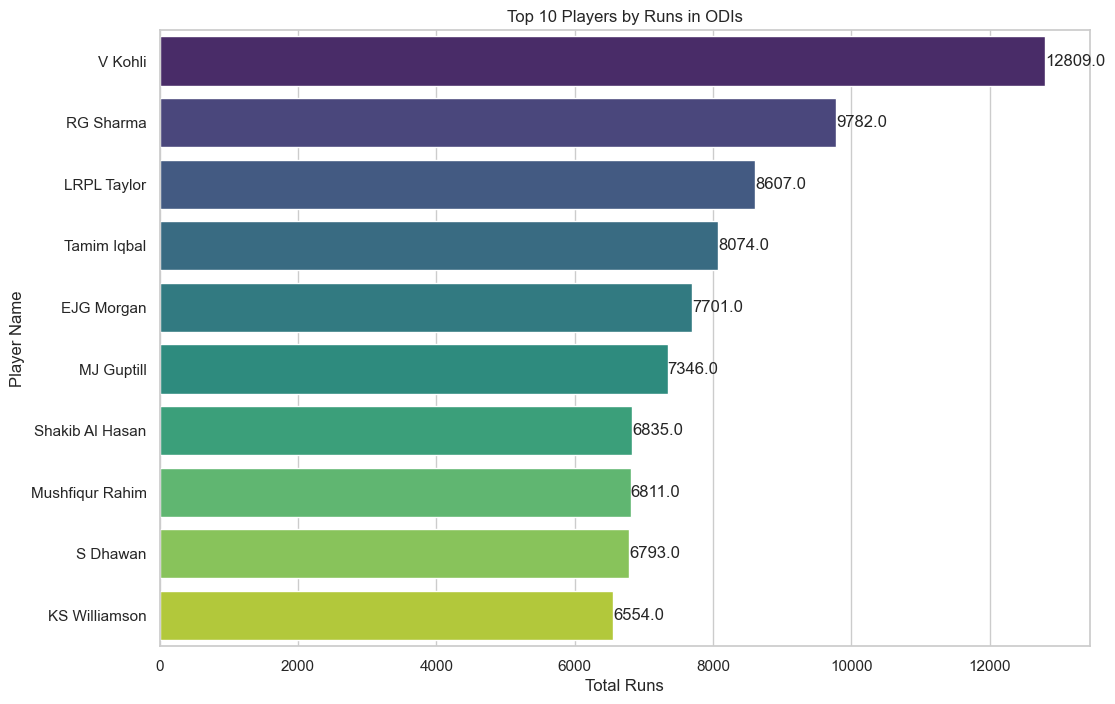

In [27]:
# Top 10 Players by Runs
top_players = odi_batting_df_sorted.head(10)

# Horizontal bar plot with color gradient
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='runs', y='name', data=top_players, palette='viridis')

# Adding data labels
for index, value in enumerate(top_players['runs']):
    bar_plot.text(value, index, f'{value}', ha='left', va='center', fontsize=12)

plt.title('Top 10 Players by Runs in ODIs')
plt.xlabel('Total Runs')
plt.ylabel('Player Name')
plt.show()


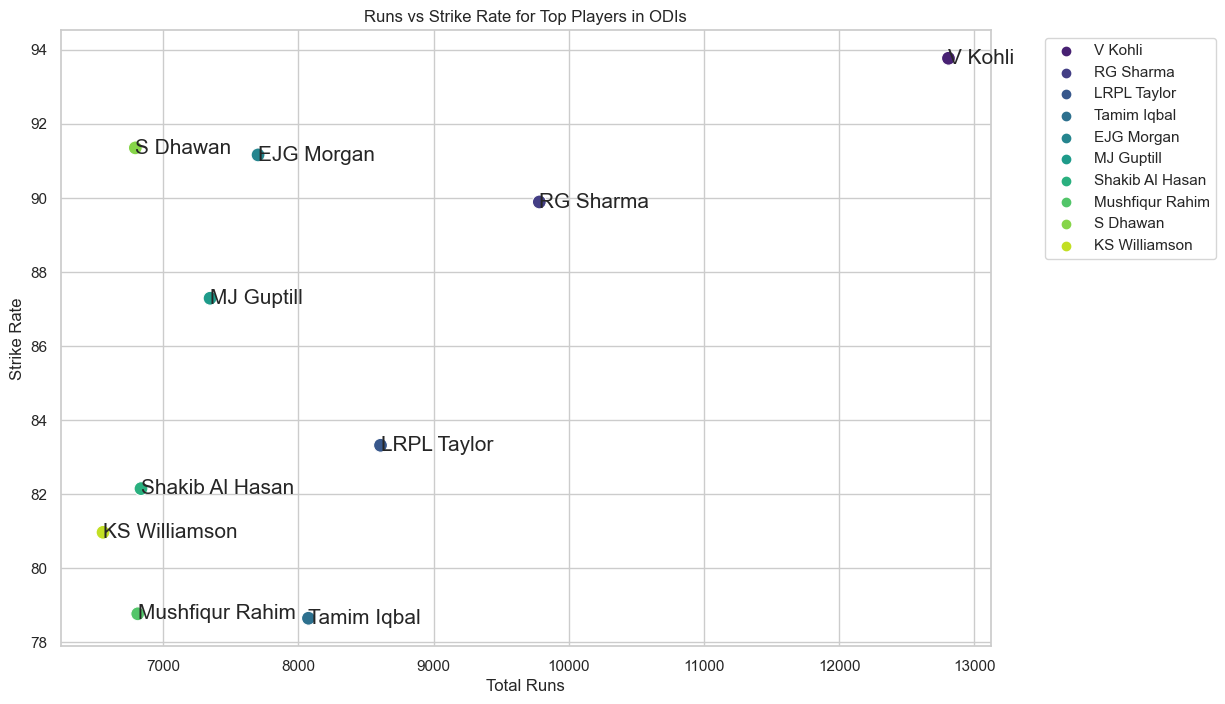

In [33]:
# Selecting the top players
top_players = odi_batting_df_sorted.head(10)

# Scatter plot of Runs vs Strike Rate for top players
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='runs', y='strike_rate', data=top_players, hue='name', palette='viridis', s=100)

# Adding data labels
for index, player in top_players.iterrows():
    scatter_plot.text(player['runs'], player['strike_rate'], player['name'], ha='left', va='center', fontsize=15)

plt.title('Runs vs Strike Rate for Top Players in ODIs')
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



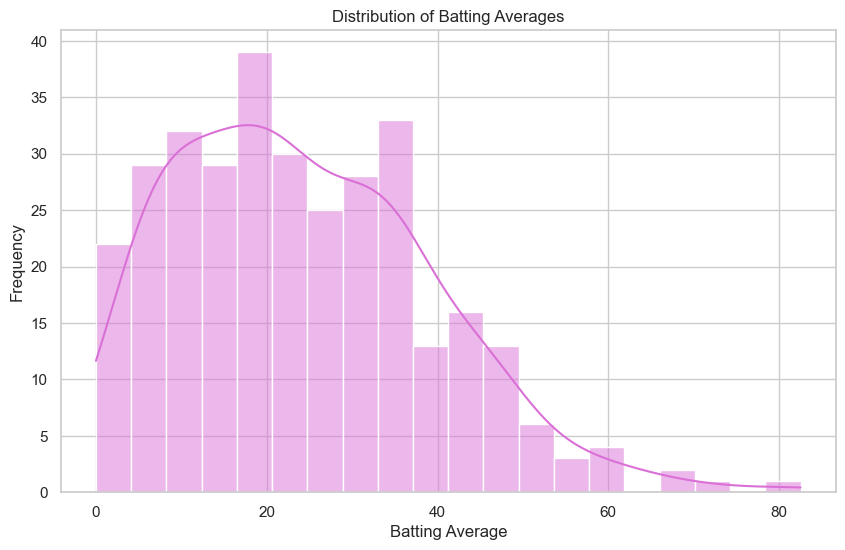

In [35]:
# Histogram of Batting Averages
plt.figure(figsize=(10, 6))
sns.histplot(odi_batting_df['average_score'], bins=20, kde=True, color='orchid')
plt.title('Distribution of Batting Averages')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.show()


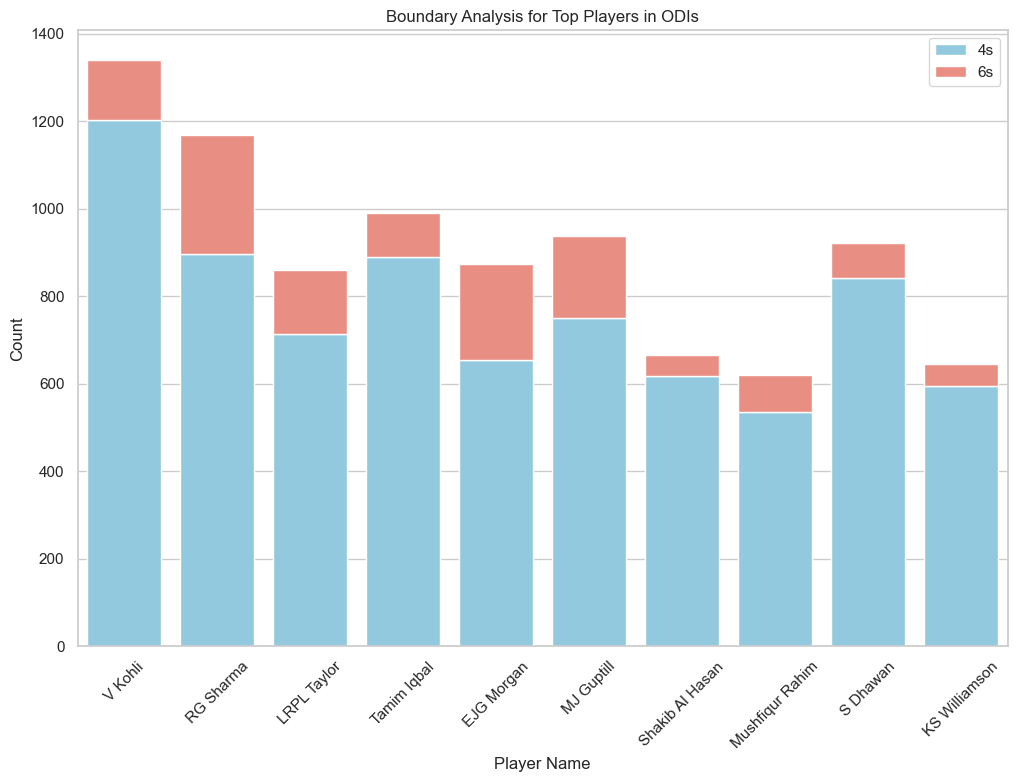

In [40]:

# Selecting the first few players in the sorted dataset
top_players_boundary_analysis = odi_batting_df_sorted.head(10)


plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='4s', data=top_players_boundary_analysis, color='skyblue', label='4s')
sns.barplot(x='name', y='6s', data=top_players_boundary_analysis, color='salmon', bottom=top_players_boundary_analysis['4s'], label='6s')
plt.title('Boundary Analysis for Top Players in ODIs')
plt.xlabel('Player Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()



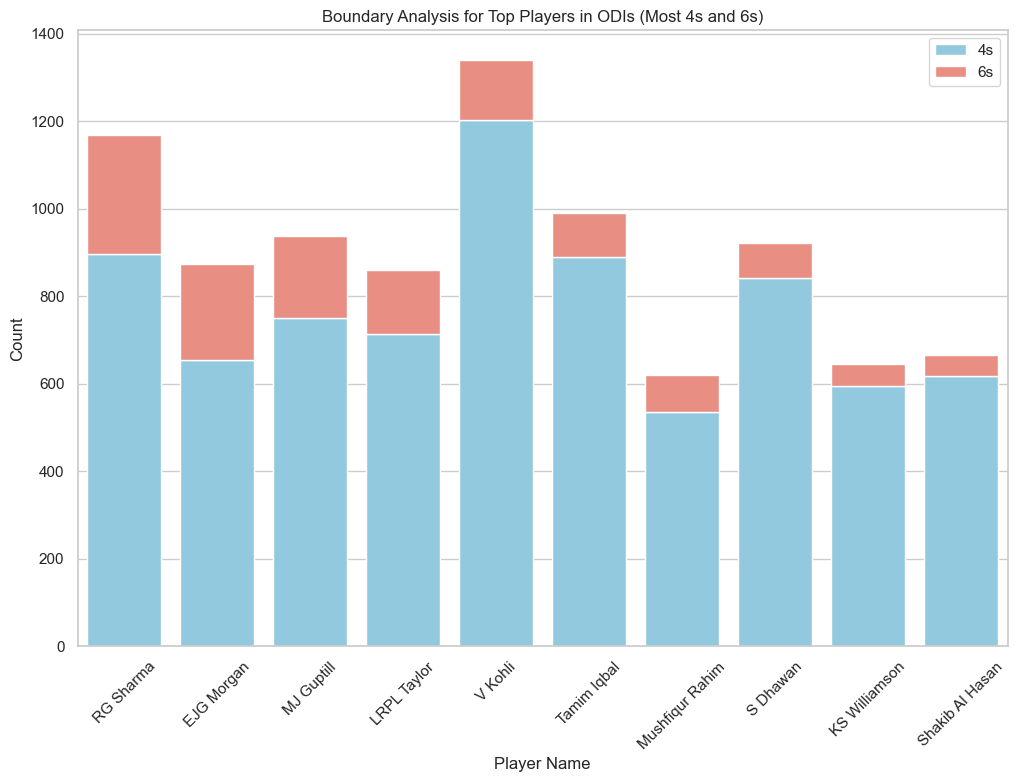

In [42]:
# Selecting the top players based on total runs
top_players_sixes_fours = odi_batting_df_sorted.head(10)

# Sorting the selected players by total sixes and fours
top_players_sixes_fours = top_players_sixes_fours.sort_values(by=['6s', '4s'], ascending=False)

# Stacked bar plot for 4s and 6s
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='4s', data=top_players_sixes_fours, color='skyblue', label='4s')
sns.barplot(x='name', y='6s', data=top_players_sixes_fours, color='salmon', bottom=top_players_sixes_fours['4s'], label='6s')
plt.title('Boundary Analysis for Top Players in ODIs (Most 4s and 6s)')
plt.xlabel('Player Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


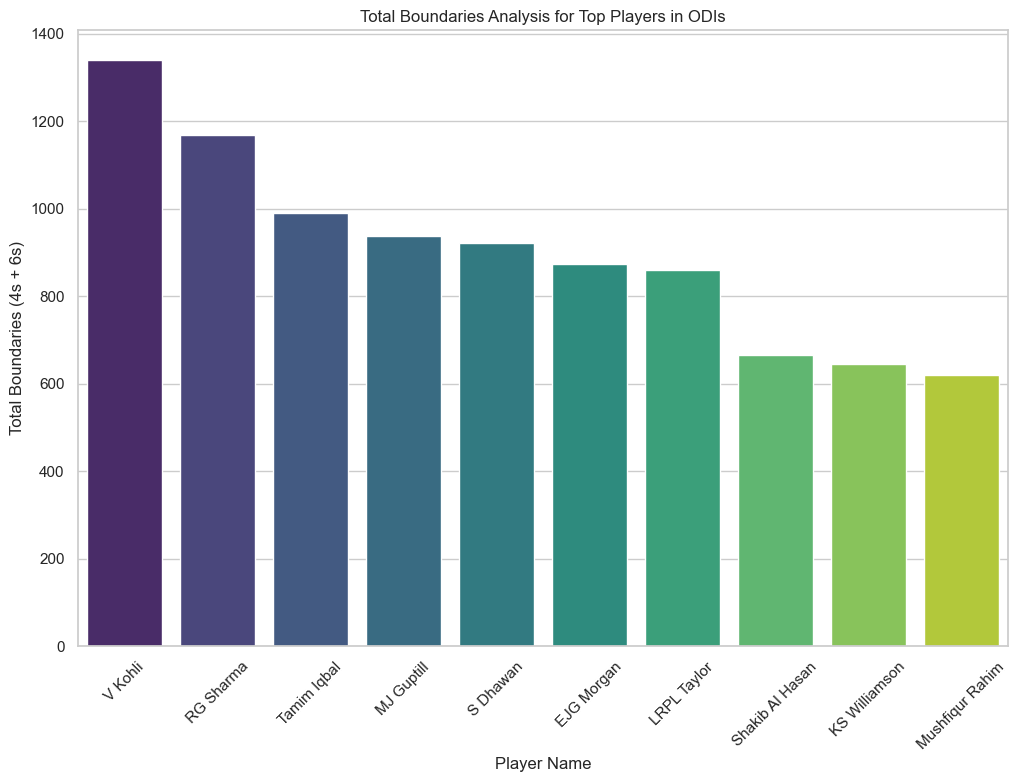

In [46]:
# Creating a new column for total boundaries
odi_batting_df_sorted['total_boundaries'] = odi_batting_df_sorted['4s'] + odi_batting_df_sorted['6s']

# Selecting the top players based on total runs
top_players_boundaries = odi_batting_df_sorted.head(10)

# Sorting the selected players by total boundaries
top_players_boundaries = top_players_boundaries.sort_values(by='total_boundaries', ascending=False)

# Bar plot for total boundaries
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='total_boundaries', data=top_players_boundaries, palette='viridis')
plt.title('Total Boundaries Analysis for Top Players in ODIs')
plt.xlabel('Player Name')
plt.ylabel('Total Boundaries (4s + 6s)')
plt.xticks(rotation=45)
plt.show()


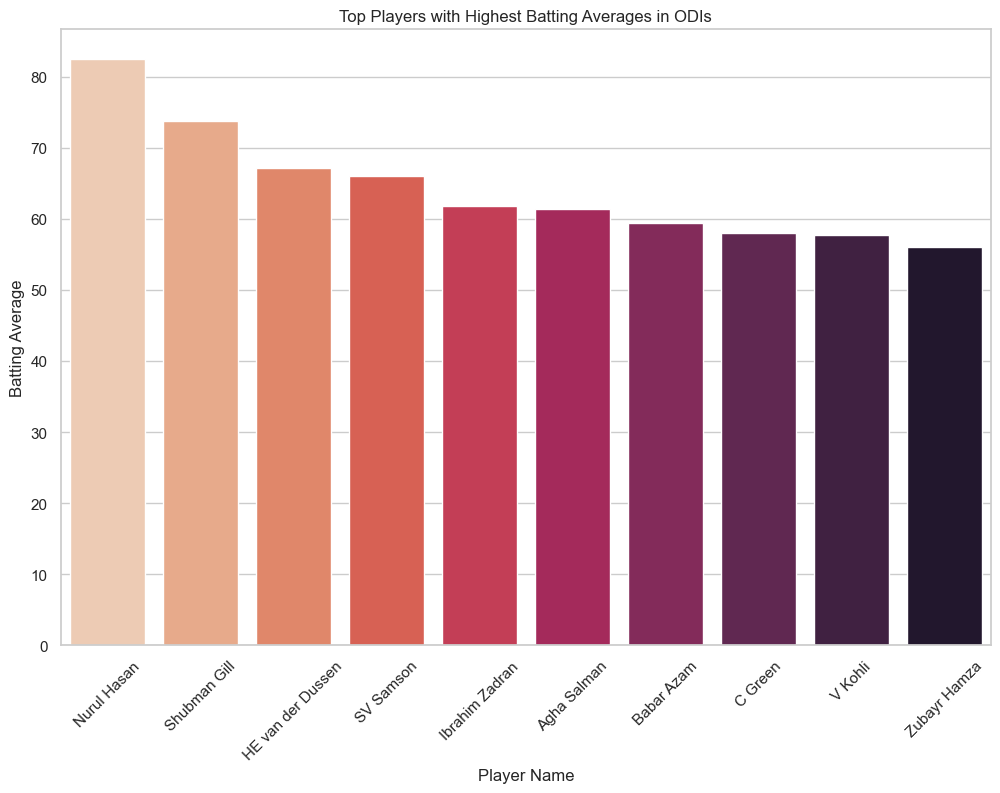

In [49]:
# Identifying top players with the highest batting averages
top_average_players = odi_batting_df.sort_values(by='average_score', ascending=False).head(10)

# 1. Batting Averages Distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='average_score', data=top_average_players, palette='rocket_r')
plt.title('Top Players with Highest Batting Averages in ODIs')
plt.xlabel('Player Name')
plt.ylabel('Batting Average')
plt.xticks(rotation=45)
plt.show()


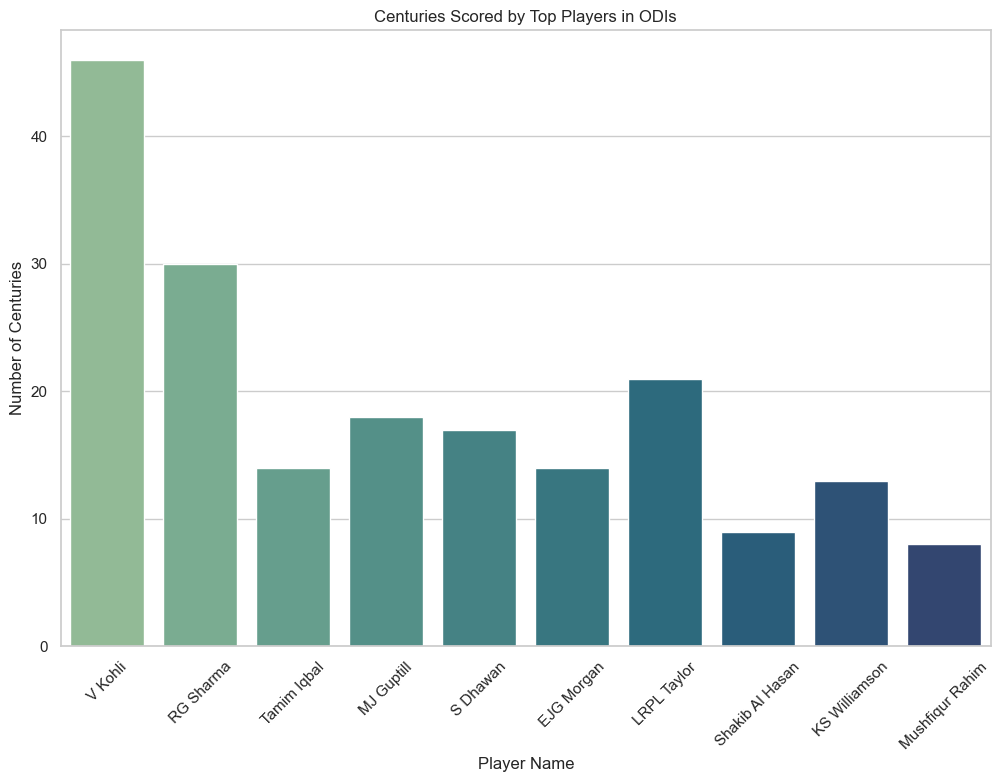

In [58]:
# Bar plot of Centuries by Top Players
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='100s', data=top_players_boundaries, palette='crest')
plt.title('Centuries Scored by Top Players in ODIs')
plt.xlabel('Player Name')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=45)
plt.show()
